In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
import sklearn.tree as tree
import sklearn.ensemble as ensem
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder,StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [4]:
data = pd.read_csv('/content/train_transaction.csv')

In [5]:
data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68765,3055765,0,1549516,49.000,W,18158,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68766,3055766,0,1549557,160.500,W,16132,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68767,3055767,0,1549558,100.000,R,11106,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68768,3055768,0,1549564,36.950,W,14420,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Selected Few Columns for analysis
Dataset1 = data[["TransactionID", "TransactionAmt","TransactionDT", "ProductCD","card4", "card6", "isFraud"]]

In [8]:
Dataset1.head(10)

,TransactionID,TransactionAmt,TransactionDT,ProductCD,card4,card6,isFraud
0,2987000,68.5,86400,W,discover,credit,0
1,2987001,29.0,86401,W,mastercard,credit,0
2,2987002,59.0,86469,W,visa,debit,0
3,2987003,50.0,86499,W,mastercard,debit,0
4,2987004,50.0,86506,H,mastercard,credit,0
5,2987005,49.0,86510,W,visa,debit,0
6,2987006,159.0,86522,W,visa,debit,0
7,2987007,422.5,86529,W,visa,debit,0
8,2987008,15.0,86535,H,visa,debit,0
9,2987009,117.0,86536,W,mastercard,debit,0


In [9]:
# Description of isFraud column
Dataset1.groupby("isFraud").describe()

TransactionID                                                     \
                count          mean           std        min         25%   
isFraud                                                                    
0             66926.0  3.021410e+06  19859.397276  2987000.0  3004200.25   
1              1844.0  3.020469e+06  19577.534845  2987203.0  3003807.00   

                                          TransactionAmt              ...  \
               50%         75%        max          count        mean  ...   
isFraud                                                               ...   
0        3021441.0  3038585.75  3055769.0        66926.0  127.567595  ...   
1        3019382.5  3038375.75  3055726.0         1844.0  136.667890  ...   

                          TransactionDT                                \
             75%      max         count           mean            std   
isFraud                                                                 
0        122.169  4829.95       66926.0  836749.300227  428664.614788   
1        152.513  3081.97        1844.0  815485.024946  423253.668490   

                                                              
             min        25%       50%         75%        max  
isFraud                                                       
0        86400.0  450675.50  851322.5  1209307.75  1549610.0  
1        89760.0  441504.25  791147.0  1206632.00  1549109.0  

[2 rows x 24 columns]

In [10]:
Dataset1.groupby("ProductCD").describe()

TransactionID                                                     \
                  count          mean           std        min         25%   
ProductCD                                                                    
C                7187.0  3.023501e+06  20034.593279  2987010.0  3006324.50   
H               10803.0  3.025274e+06  18472.857467  2987004.0  3010890.50   
R                5998.0  3.030693e+06  17693.179545  2987099.0  3017103.25   
S                1917.0  3.021135e+06  18650.685481  2987038.0  3005919.00   
W               42865.0  3.018758e+06  19901.700526  2987000.0  3001273.00   

                                           TransactionAmt              ...  \
                 50%        75%        max          count        mean  ...   
ProductCD                                                              ...   
C          3023522.0  3041665.5  3055769.0         7187.0   47.625912  ...   
H          3026166.0  3040728.5  3055764.0        10803.0   71.911599  ...   
R          3034093.0  3045453.0  3055767.0         5998.0  180.622708  ...   
S          3020748.0  3036143.0  3055716.0         1917.0   60.283672  ...   
W          3017427.0  3035782.0  3055768.0        42865.0  150.974391  ...   

          TransactionDT             isFraud                                \
                    75%        max    count      mean       std  min  25%   
ProductCD                                                                   
C             1279596.5  1549610.0   7187.0  0.099207  0.298960  0.0  0.0   
H             1268851.0  1549498.0  10803.0  0.016107  0.125892  0.0  0.0   
R             1355134.5  1549558.0   5998.0  0.019006  0.136558  0.0  0.0   
S             1179796.0  1548914.0   1917.0  0.019301  0.137617  0.0  0.0   
W             1173001.0  1549564.0  42865.0  0.018803  0.135831  0.0  0.0   

                          
           50%  75%  max  
ProductCD                 
C          0.0  0.0  1.0  
H          0.0  0.0  1.0  
R          0.0  0.0  1.0  
S          0.0  0.0  1.0  
W          0.0  0.0  1.0  

[5 rows x 32 columns]

In [11]:
#Checking for Null values
Dataset1.isna().any()

TransactionID     False
TransactionAmt    False
TransactionDT     False
ProductCD         False
card4              True
card6              True
isFraud           False
dtype: bool

In [13]:
#Null value presented in card 4 and card 6
Dataset1.isna().sum()


TransactionID     0
TransactionAmt    0
TransactionDT     0
ProductCD         0
card4             6
card6             3
isFraud           0
dtype: int64

In [14]:
Dataset1.size

481390

In [15]:
datanew = Dataset1.dropna()

In [16]:
datanew

,TransactionID,TransactionAmt,TransactionDT,ProductCD,card4,card6,isFraud
0,2987000,68.500,86400,W,discover,credit,0
1,2987001,29.000,86401,W,mastercard,credit,0
2,2987002,59.000,86469,W,visa,debit,0
3,2987003,50.000,86499,W,mastercard,debit,0
4,2987004,50.000,86506,H,mastercard,credit,0
...,...,...,...,...,...,...,...
68765,3055765,49.000,1549516,W,mastercard,debit,0
68766,3055766,160.500,1549557,W,visa,debit,0
68767,3055767,100.000,1549558,R,visa,credit,0
68768,3055768,36.950,1549564,W,visa,credit,0


In [17]:
datanew.ProductCD.value_counts()


W    42863
H    10799
C     7187
R     5998
S     1917
Name: ProductCD, dtype: int64

In [18]:
datanew.card4.value_counts()


visa                45062
mastercard          21035
american express     1713
discover              954
Name: card4, dtype: int64

In [19]:
datanew.card6.value_counts()


debit              46258
credit             22497
debit or credit        6
charge card            3
Name: card6, dtype: int64

In [20]:
datanew.isna().any()


TransactionID     False
TransactionAmt    False
TransactionDT     False
ProductCD         False
card4             False
card6             False
isFraud           False
dtype: bool

<Axes: >

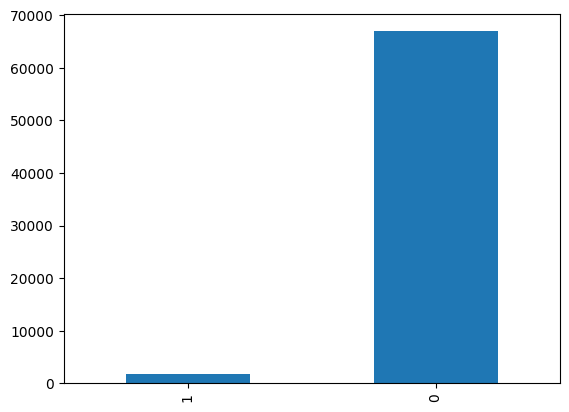

In [23]:
datanew.isFraud.value_counts().sort_values().plot(kind='bar')


In [24]:
datanew.replace({"ProductCD":{'C':0,'H':1,'R':2,'S':3,'W':4},
            "card4":{"american express":0,"discover":1,"mastercard":2,"visa":3},
            "card6":{"debit":0,"credit":1,"debit or credit":3,"charge card":4}
           }, inplace=True)

<ipython-input-24-1a31aa4b6311>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
data1 = datanew.drop(columns=['TransactionID'])


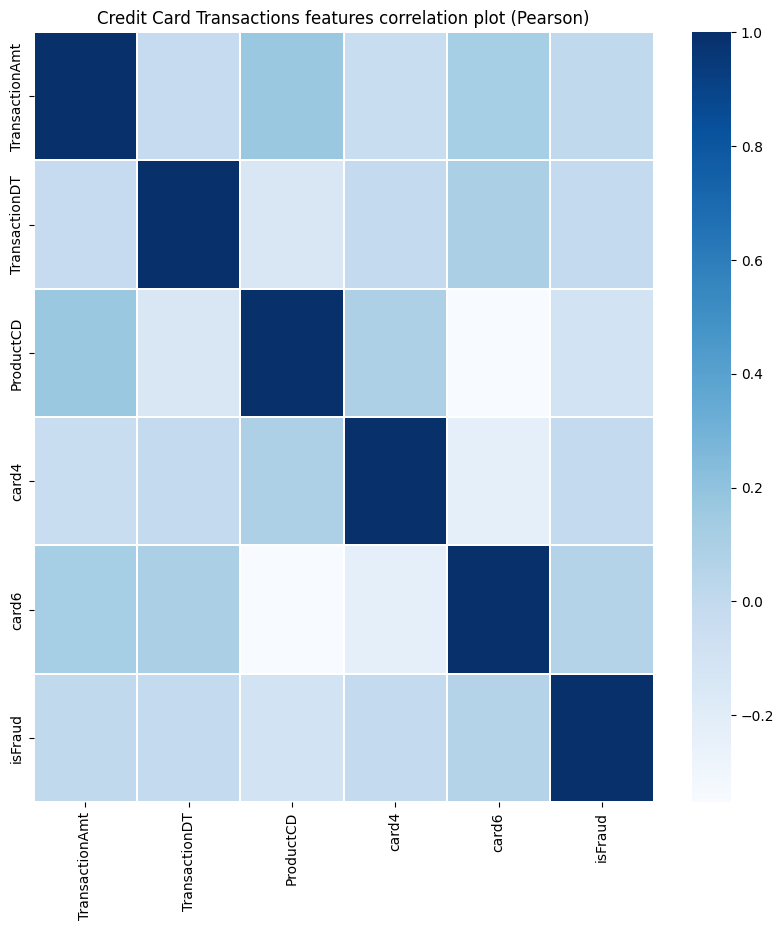

In [32]:
plt.figure(figsize = (10,10))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data1.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()


<ipython-input-33-5b55b971b416>:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


<ipython-input-33-5b55b971b416>:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


<ipython-input-33-5b55b971b416>:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


<ipython-input-33-5b55b971b416>:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameter

<Figure size 640x480 with 0 Axes>

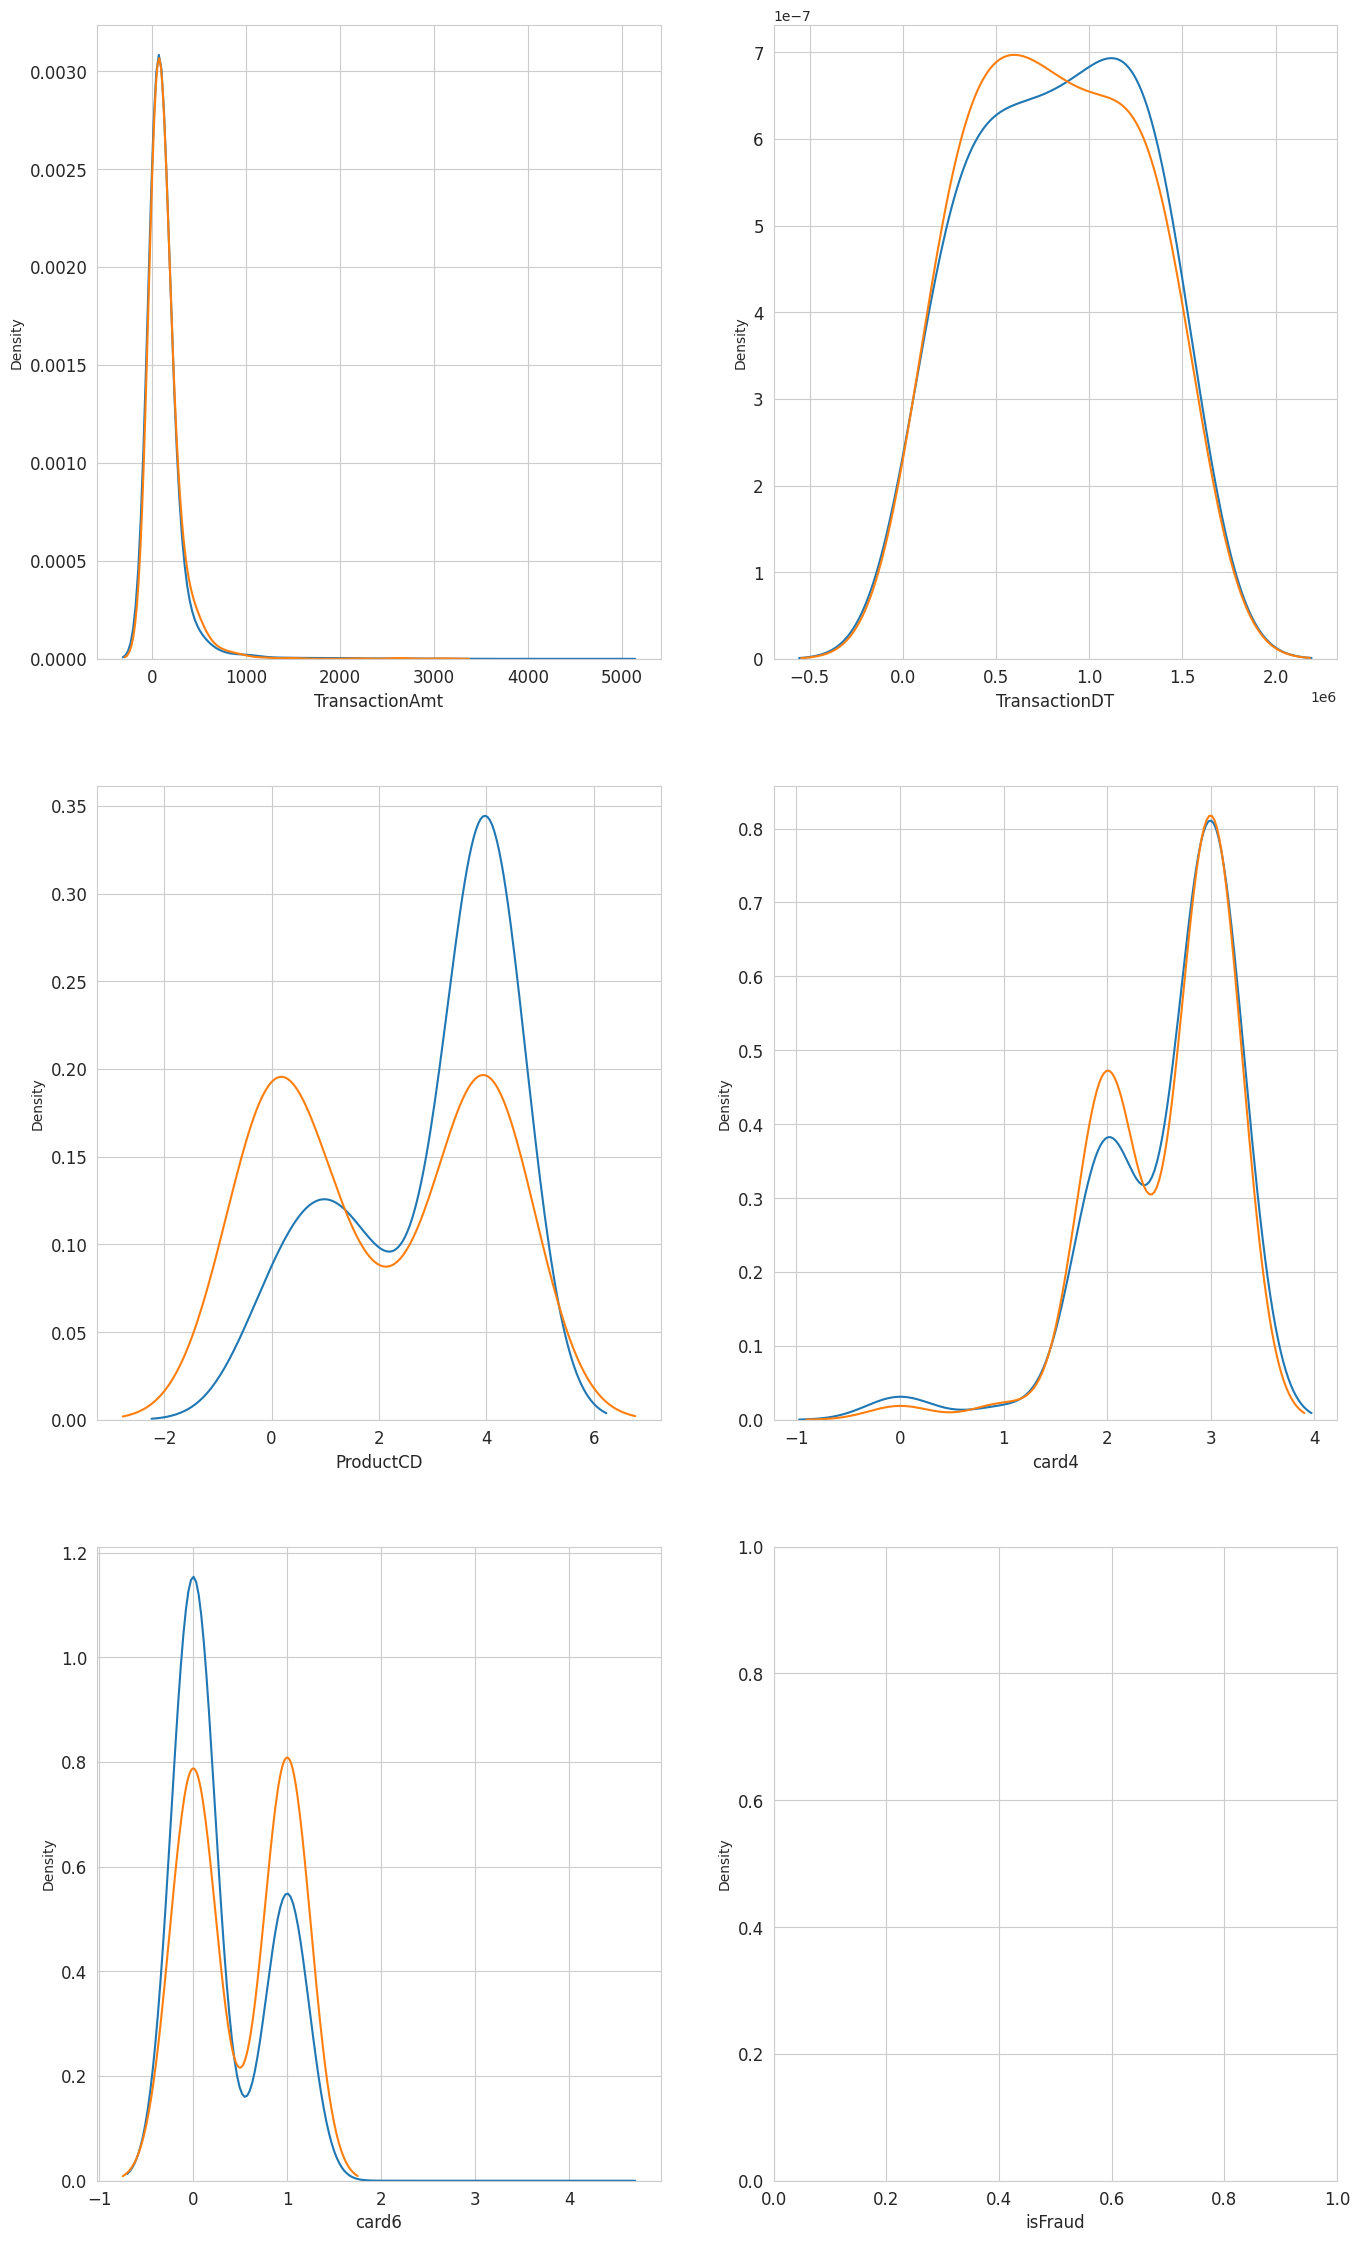

In [33]:
var = data1.columns.values

i = 0
t0 = data1.loc[data['isFraud'] == 0]
t1 = data1.loc[data['isFraud'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(3,2,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(3,2,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [36]:
data1.card4.value_counts()


3    45062
2    21035
0     1713
1      954
Name: card4, dtype: int64

In [37]:
data1.ProductCD.value_counts()


4    42863
1    10799
0     7187
2     5998
3     1917
Name: ProductCD, dtype: int64

In [38]:
indData = data1[["TransactionAmt", "TransactionDT", "ProductCD","card4",  "card6"]]
depdData = data1[["isFraud"]]

X_train, X_test, y_train, y_test \
= train_test_split(indData, depdData, stratify=depdData, test_size=0.2, random_state=0)

In [39]:
y_test


,isFraud
60598,0
44961,0
2542,0
44690,0
67359,0
...,...
24377,0
1520,0
4647,0
64175,0


In [40]:
Dec_tree =  tree.DecisionTreeClassifier(criterion='entropy',max_depth=50)


In [41]:
X_train


,TransactionAmt,TransactionDT,ProductCD,card4,card6
48155,94.499,1134713,0,2,0
31267,100.000,773296,4,3,1
38904,200.000,949894,1,3,1
37109,59.000,926699,4,2,0
8013,47.950,246750,4,3,0
...,...,...,...,...,...
30875,200.000,768639,2,3,0
39501,25.950,959066,4,2,0
529,50.000,95464,1,3,1
34619,25.000,853598,1,2,0


In [44]:
Dec_tree.fit(X_train,y_train)
predVal =  Dec_tree.predict(X_test)
actVal = y_test.values

Text(0.5, 0, 'False Positive Rate')

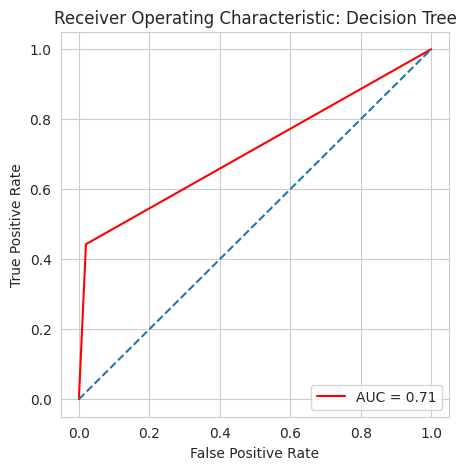

In [45]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(actVal, predVal)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic: Decision Tree')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [46]:
print('                      Decision Tree Results')
print(classification_report(actVal, predVal))

                      Decision Tree Results
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13385
           1       0.38      0.44      0.41       368

    accuracy                           0.97     13753
   macro avg       0.68      0.71      0.70     13753
weighted avg       0.97      0.97      0.97     13753



In [47]:
metric.accuracy_score(actVal, predVal)

0.9656075038173489

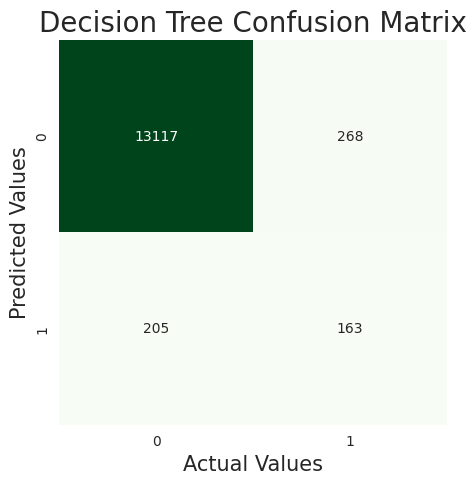

In [51]:
plt.figure(figsize=(5,5))
cm_rf = confusion_matrix(actVal, predVal)
plt.title("Decision Tree Confusion Matrix", fontsize = 20)
p=sns.heatmap(cm_rf,cbar=False,annot=True,cmap="Greens",fmt="d")
p.set_xlabel("Actual Values", fontsize = 15)
p.set_ylabel("Predicted Values", fontsize = 15)
plt.show()

In [49]:
from sklearn.tree import plot_tree
text_representation = tree.export_text(Dec_tree)

|--- feature_2 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_0 <= 0.86
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.86
|   |   |   |--- feature_1 <= 1161837.00
|   |   |   |   |--- feature_0 <= 48.30
|   |   |   |   |   |--- feature_0 <= 40.72
|   |   |   |   |   |   |--- feature_0 <= 7.34
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  7.34
|   |   |   |   |   |   |   |--- feature_0 <= 7.43
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  7.43
|   |   |   |   |   |   |   |   |--- feature_1 <= 302695.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 97981.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 97382.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  97382.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_1 >  97981.00
|   |   |   |   |

[Text(0.3655278738478208, 0.9895833333333334, 'x[2] <= 0.5\nentropy = 0.178\nsamples = 55011\nvalue = [53537, 1474]'),
 Text(0.12700304820748112, 0.96875, 'x[4] <= 0.5\nentropy = 0.465\nsamples = 5763\nvalue = [5194, 569]'),
 Text(0.05790464384913803, 0.9479166666666666, 'x[0] <= 0.859\nentropy = 0.336\nsamples = 3383\nvalue = [3173, 210]'),
 Text(0.05717007552280605, 0.9270833333333334, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.05863921217547001, 0.9270833333333334, 'x[1] <= 1161837.0\nentropy = 0.329\nsamples = 3377\nvalue = [3173, 204]'),
 Text(0.025331129628354338, 0.90625, 'x[0] <= 48.304\nentropy = 0.264\nsamples = 2190\nvalue = [2092, 98]'),
 Text(0.01062828547161582, 0.8854166666666666, 'x[0] <= 40.722\nentropy = 0.209\nsamples = 1515\nvalue = [1465, 50]'),
 Text(0.009893717145283842, 0.8645833333333334, 'x[0] <= 7.342\nentropy = 0.226\nsamples = 1372\nvalue = [1322, 50]'),
 Text(0.009159148818951864, 0.84375, 'entropy = 0.0\nsamples = 130\nvalue = [130, 0]'),
 Tex

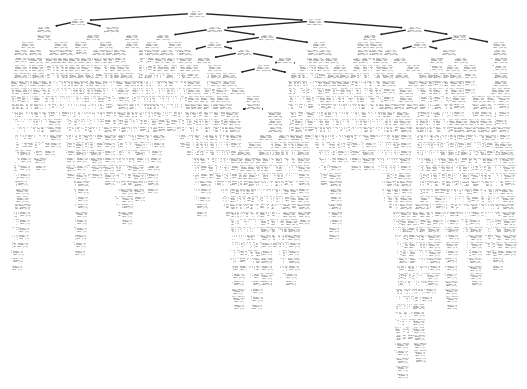

In [50]:
print(text_representation)
tree.plot_tree(Dec_tree)

In [55]:
classifiers = [
    MultinomialNB(alpha = 0.5),
    SVC(kernel = 'sigmoid',gamma = 1.0, probability=True),
    KNeighborsClassifier(n_neighbors=100),
    RandomForestClassifier(n_estimators=37,random_state=252),
    AdaBoostClassifier(n_estimators=37, random_state=252),
    BaggingClassifier(n_estimators=9, random_state=252)
]


# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [57]:
for clf in classifiers:
    clf.fit(X_train,y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

<ipython-input-57-2a44f13a2bf6>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MultinomialNB
****Results****
Accuracy: 76.8632%
Log Loss: 2.9313436533678314
SVC
****Results****
Accuracy: 97.3242%
Log Loss: 0.1232933164141119
KNeighborsClassifier
****Results****


<ipython-input-57-2a44f13a2bf6>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 97.3242%
Log Loss: 0.1545172458046707


<ipython-input-57-2a44f13a2bf6>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-57-2a44f13a2bf6>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier
****Results****
Accuracy: 97.8041%
Log Loss: 0.3215213178563329


<ipython-input-57-2a44f13a2bf6>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostClassifier
****Results****
Accuracy: 97.3315%
Log Loss: 0.6424293322339404


<ipython-input-57-2a44f13a2bf6>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



BaggingClassifier
****Results****
Accuracy: 97.6078%
Log Loss: 0.38817765266659215


<ipython-input-57-2a44f13a2bf6>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

